In [14]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
%matplotlib inline
fig_dir = "/Users/crankshaw/model-serving/clipper_paper/ModelServingPaper/nsdi_2017/fake-figs"

results_files = []
for name in os.listdir("."):
    if "results" in name:
        results_files.append(name)

In [15]:
def get_results(fname):
    with open(fname, "r") as f:
        results = json.load(f)
        num_reps = int(fname.split("_")[2])
#         print results
        goodput = [t["rate"] for t in results["meters"] if t["name"] == "logistic_reg:cache_included_thruput"][0]
#         print goodput
#         hit_rate = [h["ratio"] for h in results["ratio_counters"] if h["name"] == "cache_hits"][0]
#         thruput = [h["rate"] for h in results["meters"] if h["name"] == "spark_svm:cache_included_thruput"][0]
    return (num_reps, goodput)
(reps, goodputs) = zip(*[get_results(fname) for fname in results_files])

In [16]:
extracted_res = [get_results(fname) for fname in results_files]
extracted_res.sort()
print extracted_res
print ""
(reps, goodputs) = zip(*extracted_res)
print reps, goodputs

[(1, 8121.325812109526), (2, 17324.128094471067), (4, 33070.075606134866), (8, 59515.46812355802), (12, 78387.6631844278), (16, 81906.76017808888), (20, 86090.07952004934)]

(1, 2, 4, 8, 12, 16, 20) (8121.325812109526, 17324.128094471067, 33070.075606134866, 59515.46812355802, 78387.6631844278, 81906.76017808888, 86090.07952004934)


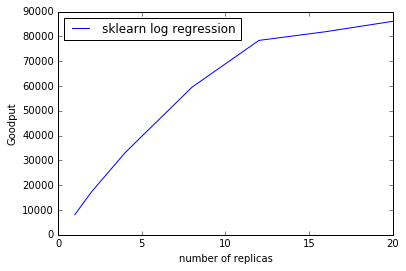

In [18]:
fig, ax = plt.subplots()
ax.plot(reps, goodputs, label="sklearn log regression")
# xs = np.arange(0, 1.1, 0.1)
# ys = 7500 + 106000*xs
# ax.plot(xs, ys, label="upper bound")
ax.set_xlabel("number of replicas")
ax.set_ylabel("Goodput")
ax.legend(loc=0)
# ax.set_xlim(0.0, 1.0)
plt.savefig("%s/pred_thruput_vs_num_replicas_single_node.pdf" % (fig_dir), bbox_inches='tight')
plt.show()